In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
from EDA_functions import *

In [2]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [4]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [5]:
df['CDR'].fillna(0.1, inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,436.0,51.357798,25.269862,18.000,23.00000,54.000,74.00000,96.000
Educ,235.0,3.178723,1.311510,1.000,2.00000,3.000,4.00000,5.000
SES,216.0,2.490741,1.120593,1.000,2.00000,2.000,3.00000,5.000
MMSE,235.0,27.063830,3.696870,14.000,26.00000,29.000,30.00000,30.000
CDR,436.0,0.199771,0.295988,0.000,0.00000,0.100,0.10000,2.000
eTIV,436.0,1481.919725,158.740866,1123.000,1367.75000,1475.500,1579.25000,1992.000
nWBV,436.0,0.791670,0.059937,0.644,0.74275,0.809,0.84200,0.893
ASF,436.0,1.198894,0.128682,0.881,1.11175,1.190,1.28425,1.563
Delay,20.0,20.550000,23.862490,1.000,2.75000,11.000,30.75000,89.000


<AxesSubplot:xlabel='Age', ylabel='Count'>

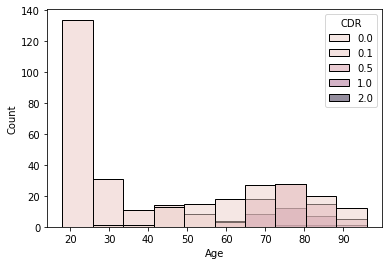

In [7]:
sns.histplot(data=df, x="Age", hue="CDR")

In [8]:
young(df).describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,161.000000,0.0,0.0,0.0,1.610000e+02,161.000000,161.000000,161.000000,19.000000
mean,22.490683,NaN,NaN,NaN,1.000000e-01,1512.826087,0.846509,1.174696,21.105263
std,3.025141,NaN,NaN,NaN,1.392109e-17,150.301263,0.019162,0.122740,24.383270
min,18.000000,NaN,NaN,NaN,1.000000e-01,1131.000000,0.777000,0.917000,1.000000
25%,20.000000,NaN,NaN,NaN,1.000000e-01,1432.000000,0.837000,1.103000,2.500000
50%,22.000000,NaN,NaN,NaN,1.000000e-01,1514.000000,0.847000,1.161000,12.000000
75%,24.000000,NaN,NaN,NaN,1.000000e-01,1591.000000,0.858000,1.227000,33.500000
max,30.000000,NaN,NaN,NaN,1.000000e-01,1913.000000,0.893000,1.551000,89.000000


In [9]:
tra, sag, cor= load_MRI_gifs(df["ID"], "all")

In [10]:
#all labels
df["labels"]= df['CDR']!=0

In [11]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,labels
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,False
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,False
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,True
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,0.1,1588,0.803,1.105,NaN,True
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,0.1,1737,0.848,1.010,NaN,True


In [12]:
# x_min, x_max, y_min, y_max
tra_box = [45, 130, 50, 130]
sag_box = [0, 75, 20, 80]
cor_box = [50, 130, 110, 145]
all_box = [tra_box, sag_box, cor_box]

'plt.axhline(t_ymin, xmin=t_xmin, xmax=t_xmax)\nplt.axhline(t_ymax, xmin=t_xmin, xmax=t_xmax)\nplt.axvline(t_xmin, ymin=t_ymin, ymax=t_ymax)\nplt.axvline(t_xmax, ymin=t_ymin, ymax=t_ymax)'

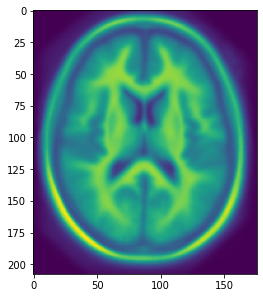

In [13]:
img_mean(load_MRI_gifs(demented(df)["ID"], "traverse"))
'''plt.axhline(t_ymin)
plt.axhline(t_ymax)
plt.axvline(t_xmin)
plt.axvline(t_xmax)'''
'''plt.axhline(t_ymin, xmin=t_xmin, xmax=t_xmax)
plt.axhline(t_ymax, xmin=t_xmin, xmax=t_xmax)
plt.axvline(t_xmin, ymin=t_ymin, ymax=t_ymax)
plt.axvline(t_xmax, ymin=t_ymin, ymax=t_ymax)'''

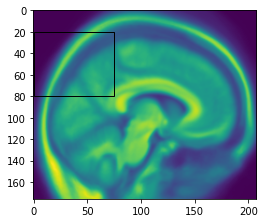

In [14]:
img_mean(load_MRI_gifs(demented(df)["ID"], "sagittal"), box=sag_box)

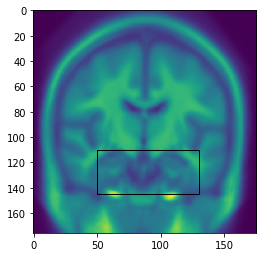

In [15]:
img_mean(load_MRI_gifs(demented(df)["ID"], "cortical"), box=cor_box)

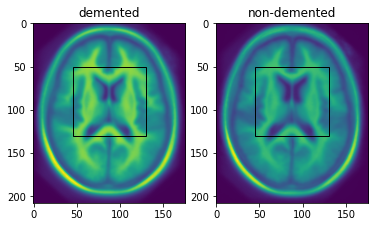

In [16]:
compare_two_means(
    load_MRI_gifs(demented(df)["ID"], "traverse"), 
    load_MRI_gifs(non_demented(df)["ID"], "traverse"), 
    "demented", "non-demented", box=tra_box)

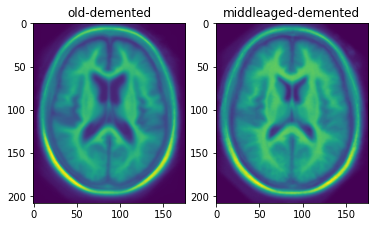

In [17]:
compare_two_means(
    load_MRI_gifs(old(demented(df))["ID"], "traverse"), 
    load_MRI_gifs(middleaged(demented(df))["ID"], "traverse"), 
    "old-demented", "middleaged-demented")

/Users/valentin/neuefische/ds-capstone-alzheimers-/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/valentin/neuefische/ds-capstone-alzheimers-/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: Invalid shape () for image data

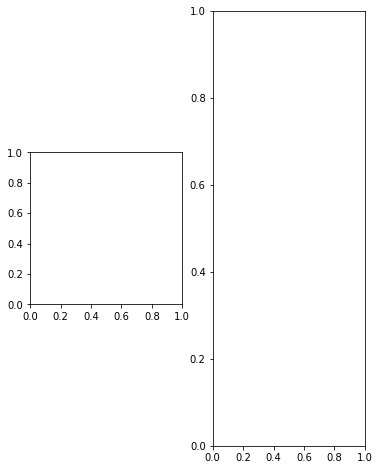

In [18]:
compare_two_means(
    load_MRI_gifs(young(non_demented(df))["ID"], "traverse"), 
    load_MRI_gifs(old(non_demented(df))["ID"], "traverse"), 
    "young_non-demented", "old_non-demented", box=tra_box)

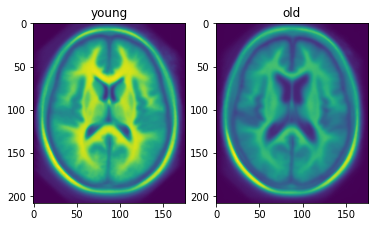

In [19]:
compare_two_means(
    load_MRI_gifs(young(df)["ID"], "traverse"), 
    load_MRI_gifs(old(df)["ID"], "traverse"), 
    "young", "old", all=False)

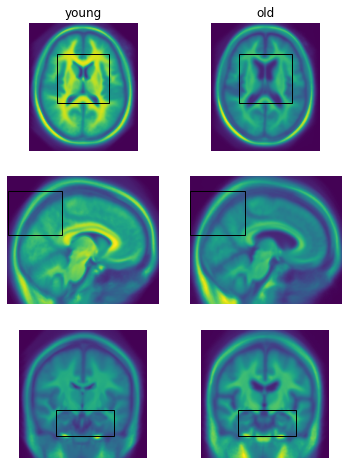

In [20]:
compare_two_means(
    load_MRI_gifs(young(df)["ID"], "all"), 
    load_MRI_gifs(old(df)["ID"], "all"), 
    "young", "old", all=True, box=all_box)

In [21]:
tra_90 = load_MRI_gifs(plane="traverse", IDs=df["ID"])

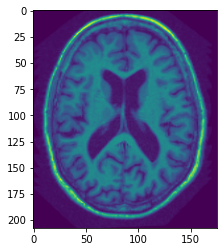

In [22]:
plt.imshow(tra_90[0])

In [23]:
tra_90[0][45:130,50:130]

array([[73, 76, 74, ..., 38, 36, 37],
       [80, 75, 75, ..., 37, 39, 46],
       [78, 74, 73, ..., 47, 51, 58],
       ...,
       [90, 68, 43, ..., 90, 90, 88],
       [88, 63, 38, ..., 91, 91, 88],
       [89, 62, 35, ..., 88, 87, 93]], dtype=uint8)

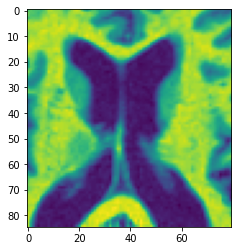

In [24]:
plt.imshow(tra_90[0][45:130,50:130])

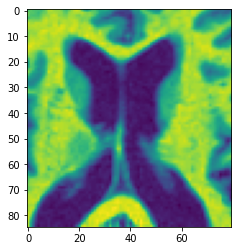

In [25]:
plt.imshow(extract_box(tra_90[0], box=tra_box))